<a href="https://colab.research.google.com/github/AlexandreOpencClassrooms/cours/blob/main/fr/realisez-une-analyse-exploratoireRealisez_une_analyse_exploratoire_partie3_page_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Micro TP

# Preliminary

## 1.1 Context

version 0.0.0
last update 2022-08-03
author Alexandre Gazagnes

## 1.2 Imports

Importons les librairies

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import 

SyntaxError: ignored

## 1.3 Graphics

Chargeons les librairies graphiques

In [40]:
sns.set()

## 1.4 Data

Chargeons les données. Nous utiliserons le dataframe iris, directement présent dans `scikit-learn`. 

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne prettez pas trop attention aux lignes ci dessous.

In [41]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
cols = [i.split('(')[0].replace(" ", "_")[:-1] for i in df.columns]
df.columns = cols
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
df["cluster"] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. First Tour

Faisons un tour très rapide de nos données

## 2.1 Display

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,cluster
115,6.4,3.2,5.3,2.3,2
98,5.1,2.5,3.0,1.1,1
119,6.0,2.2,5.0,1.5,2
103,6.3,2.9,5.6,1.8,2
5,5.4,3.9,1.7,0.4,0
14,5.8,4.0,1.2,0.2,0
61,5.9,3.0,4.2,1.5,1
107,7.3,2.9,6.3,1.8,2
15,5.7,4.4,1.5,0.4,0
24,4.8,3.4,1.9,0.2,0


In [46]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,cluster
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## 2.2 Structure

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   cluster       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [48]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
cluster          3
dtype: int64

## 2.3 NaN & duplicated

In [49]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
cluster         0
dtype: int64

In [50]:
df.duplicated().sum()

1

Nous allons supprimer la ligne dupliquée.

In [51]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 2.4 Data Inspection

Nous allons faire une très rapide insepction des données.

In [52]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


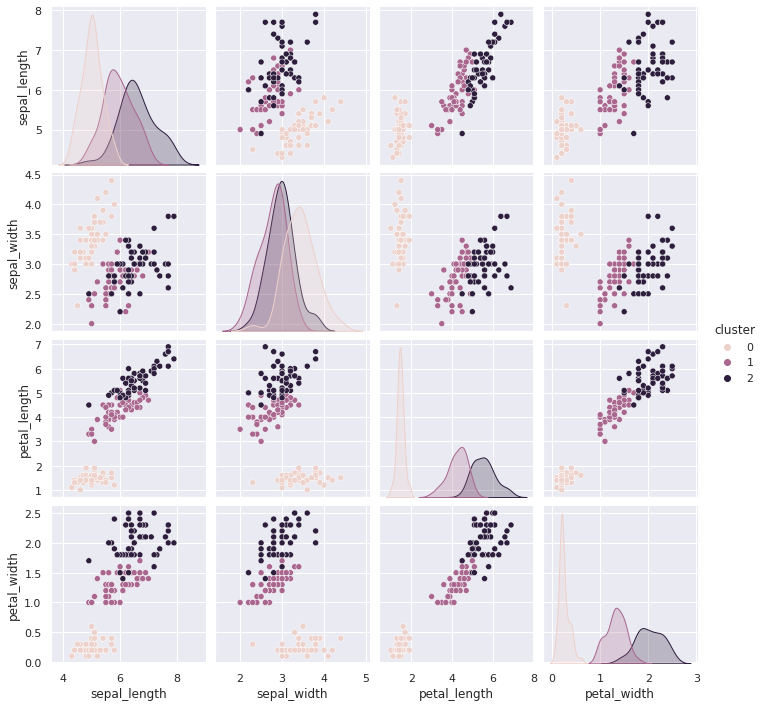

In [53]:
sns.pairplot(df, hue="cluster")

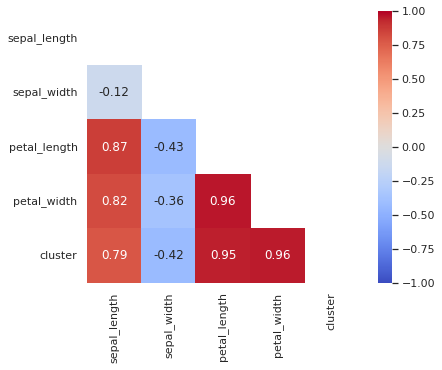

In [54]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# 3. Data preparation

## 3.1 Select only 2 features

In [55]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'cluster'],
      dtype='object')

In [59]:
cols = ["sepal_length","petal_width", "cluster" ]
df = df[cols]
df.head()

,sepal_length,petal_width,cluster
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0


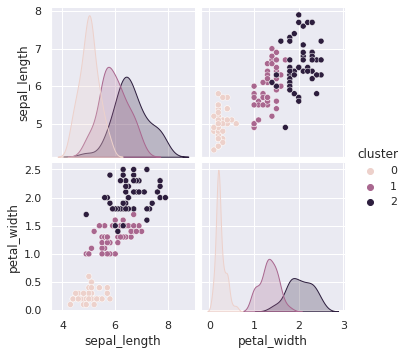

In [60]:
sns.pairplot(df, hue="cluster")

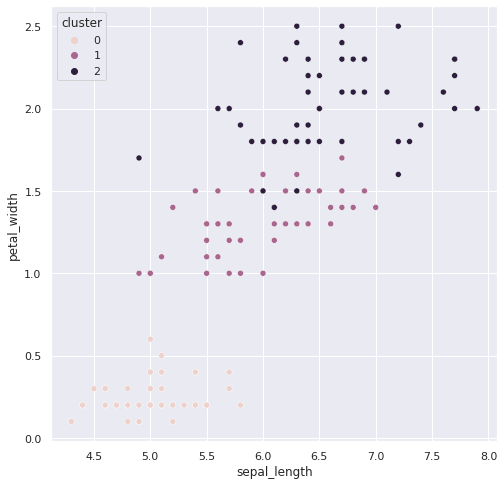

In [69]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
_ = sns.scatterplot(data=df, x="sepal_length", y="petal_width", hue="cluster", ax=ax, )

# 4. About clustering

## 3.1 Centroids 

Calculons les centroides.

In [89]:
centroids = df.groupby("cluster").mean().round(2)
centroids

,sepal_length,petal_width
cluster,,
0,5.01,0.25
1,5.94,1.33
2,6.60,2.03


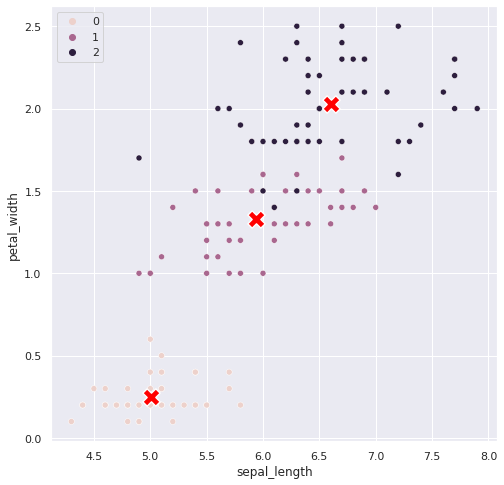

In [90]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
_ = sns.scatterplot(data=df, x="sepal_length", y="petal_width", hue="cluster", ax=ax, )
_ = sns.scatterplot(data=centroids, x="sepal_length", y="petal_width", marker="X", color="red",s=300)

## 3.2 Variance Intraclass

In [94]:
df_0 = df[df.cluster ==0]
df_0.drop(columns="cluster", inplace=True)
df_0.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [95]:
centroids.iloc[0]

sepal_length    5.01
petal_width     0.25
Name: 0, dtype: float64

In [103]:
def compute(v1, v2, verbose=0) : 
  """ """

  z = list(zip(v1, v2))
  v = [(i-j)**2 for i,j in z]
  s = sum(v)

  if verbose : 
    print(z)
    print(v)
    print(s)
  
  return s


In [104]:
compute(df_0.iloc[0],centroids.iloc[0], verbose=1 )

[(5.1, 5.01), (0.2, 0.25)]
[0.008099999999999975, 0.0024999999999999988]
0.010599999999999974


0.010599999999999974

In [109]:
all_var = df_0.apply(lambda i : compute(i, centroids.iloc[0] ), axis=1)
all_var[:10]

0    0.0106
1    0.0146
2    0.0986
3    0.1706
4    0.0026
5    0.1746
6    0.1706
7    0.0026
8    0.3746
9    0.0346
dtype: float64

In [110]:
sum(all_var)

6.634000000000001